In [ ]:
import random

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

DATASET1 = "./dataSets/DS_3Clusters_999Points.txt"
DATASET2 = "./dataSets/DS2_3Clusters_999Points.txt"
DATASET3 = "./dataSets/DS_5Clusters_10000Points.txt"
DATASET4 = "./dataSets/DS_7Clusters_100000Points.txt"

COLORS = ['red', 'blue', 'green', 'yellow', 'gray', 'pink', 'violet', 'brown', 'cyan', 'magenta']

La clase Point es inicializada con sus coordenadas así como de su dimensión.

La clase Cluster recibe una lista con sus puntos pertenecientes. Incorpora dos funciones principales:
- calculate_centroid
- update_centroid

In [2]:
class Point:
    """
    Class to represent a point in N dimension
    """

    def __init__(self, coordinates):
        self.coordinates = coordinates
        self.dimension = len(coordinates)

    def __repr__(self):
        return 'Coordinates: ' + str(self.coordinates) + \
               ' -> Dimension: ' + str(self.dimension)


class Cluster:
    """
    Class to represent a Cluster: set of points and their centroid
    """

    def __init__(self, points):
        if len(points) == 0:
            raise Exception("Cluster cannot have 0 Points")
        else:
            self.points = points
            self.dimension = points[0].dimension

        # Check that all elements of the cluster have the same dimension
        for p in points:
            if p.dimension != self.dimension:
                raise Exception(
                    "Point %s has dimension %d different with %d from the rest "
                    "of points") % (p, len(p), self.dimension)

        # Calculate Centroid
        self.centroid = self.calculate_centroid()
        self.converge = False

    def calculate_centroid(self):
        """
        Method that calculates the centroid of the Cluster, calculating
        the average of each of the coordinates of the points
        :return: Centroid of cluster
        """
        sum_coordinates = np.zeros(self.dimension)
        for p in self.points:
            for i, x in enumerate(p.coordinates):
                sum_coordinates[i] += x

        return (sum_coordinates / len(self.points)).tolist()

    def update_cluster(self, points):
        """
        Calculate the new centroid and check if converge
        :param points: list of new points
        :return: updated cluster
        """
        old_centroid = self.centroid
        self.points = points
        self.centroid = self.calculate_centroid()
        self.converge = np.array_equal(old_centroid, self.centroid)

    def __repr__(self):
        cluster = 'Centroid: ' + str(self.centroid) + '\nDimension: ' + str(
            self.dimension)
        for p in self.points:
            cluster += '\n' + str(p)

        return cluster + '\n\n'


Crearemos una función para leer los datasets en formato txt, esta función devolverá una lista de objetos Point

In [ ]:
def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset:
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(Point(np.asarray(list(map(float, point.split("::"))))))
    return points

Crearemos una función para calcular el cluster más cercano a un punto dado

In [ ]:
def get_nearest_cluster(clusters, point):
    """
    Calculate the nearest cluster
    :param clusters: old clusters
    :param point: point to assign cluster
    :return: index of list cluster
    """
    dist = np.zeros(len(clusters))
    for i, c in enumerate(clusters):
        dist[i] = distance.euclidean(point.coordinates, c.centroid)
    return np.argmin(dist)

Estas funciones a continuación nos sirven para loggear información sobre los clusters. Ya están implementadas

In [ ]:
def print_clusters_status(it_counter, clusters):
    print('\nITERATION %d' % it_counter)
    for i, c in enumerate(clusters):
        print('\tCentroid Cluster %d: %s' % (i + 1, str(c.centroid)))


def print_results(clusters):
    print('\n\nFINAL RESULT:')
    for i, c in enumerate(clusters):
        print('\tCluster %d' % (i + 1))
        print('\t\tNumber Points in Cluster %d' % len(c.points))
        print('\t\tCentroid: %s' % str(c.centroid))


def plot_results(clusters):
    plt.plot()
    for i, c in enumerate(clusters):
        # plot points
        x, y = zip(*[p.coordinates for p in c.points])
        plt.plot(x, y, linestyle='None', color=COLORS[i], marker='.')
        # plot centroids
        plt.plot(c.centroid[0], c.centroid[1], 'o', color=COLORS[i],
                 markeredgecolor='k', markersize=10)
    plt.show()

Finalmente, creamos la función KMeans que recibirá únicamente:
- Un dataset a nuestra elección (DATASET1/2/3/4)
- El número de clusters (k)
- El número máximo de iteraciones

In [ ]:

def k_means(dataset, num_clusters, iterations):
    # Read data set
    points = dataset_to_list_points(dataset)

    # Select N points random to initiacize the N Clusters
    initial = random.sample(points, num_clusters)

    # Create N initial Clusters
    clusters = [Cluster([p]) for p in initial]

    # Inicialize list of lists to save the new points of cluster
    new_points_cluster = [[] for i in range(num_clusters)]

    converge = False
    it_counter = 0
    while (not converge) and (it_counter < iterations):
        # Assign points in nearest centroid
        for p in points:
            i_cluster = get_nearest_cluster(clusters, p)
            new_points_cluster[i_cluster].append(p)

        # Set new points in clusters and calculate the new centroids
        for i, c in enumerate(clusters):
            c.update_cluster(new_points_cluster[i])
        

        # Check that converge all Clusters
        converge = [c.converge for c in clusters].count(False) == 0

        # Increment counter and delete lists of clusters points
        it_counter += 1
        new_points_cluster = [[] for i in range(num_clusters)]

        # Print clusters status
        print_clusters_status(it_counter, clusters)
        

    # Print final result
    print_results(clusters)

    plot_results(clusters)


ITERATION 1
	Centroid Cluster 1: [1.4299226821111113, 1.2515517600999997]
	Centroid Cluster 2: [2.0719432783063496, 4.020104394814284]
	Centroid Cluster 3: [5.230187879312175, 4.883921015820104]

ITERATION 2
	Centroid Cluster 1: [1.930607770266168, 1.638033419119403]
	Centroid Cluster 2: [1.6149769239915495, 5.174203684129576]
	Centroid Cluster 3: [4.966093907599174, 4.899481054500002]

ITERATION 3
	Centroid Cluster 1: [2.0289635618874047, 1.9216674834732819]
	Centroid Cluster 2: [1.1519762402488896, 6.501350566604445]
	Centroid Cluster 3: [4.915377187272002, 4.844994074860001]

ITERATION 4
	Centroid Cluster 1: [2.0297243138036376, 2.002597935785454]
	Centroid Cluster 2: [1.0110313303520406, 6.881641713040817]
	Centroid Cluster 3: [4.888163414869566, 4.864725364043481]

ITERATION 5
	Centroid Cluster 1: [2.0297243138036376, 2.002597935785454]
	Centroid Cluster 2: [1.0110313303520406, 6.881641713040817]
	Centroid Cluster 3: [4.888163414869566, 4.864725364043481]


FINAL RESULT:
	Cluster

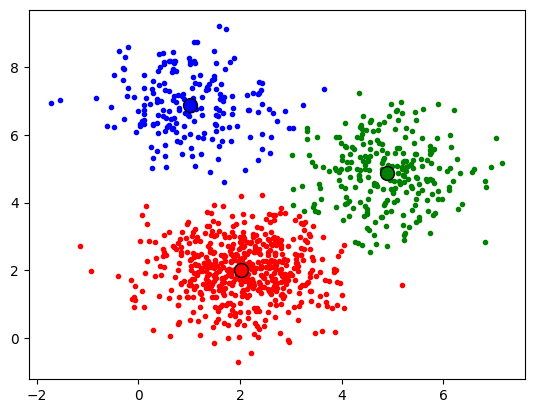

In [10]:
k_means(
    dataset=DATASET1,
    num_clusters=3,
    iterations=10
)